This is a showcase of current state of training


In [1]:
import torch
import config
import matplotlib.pyplot as plt
from model import Generator, Generator_trace
from torchvision.utils import make_grid
from math import log2
from PIL import Image
import copy
step = 4
alpha = 1
num_images = 8
device = "cpu"

#Load Generator
target_step = int(log2(256 / 4))
# gen = Generator(latent_vector=config.NOISE_DIM, factors=config.FACTORS[:target_step]).to(device)
gen = Generator_trace(latent_vector=512, factors=config.FACTORS[:target_step]).to(device)
# checkpoint = torch.load("log/step5_4.pth.tar")
checkpoint = torch.load("cachefloat16/g_checkpoint.pth.tar")
gen.load_state_dict(checkpoint["state_dict"])
gen.eval()

noise = torch.randn((num_images, 512, 1, 1)).to(device)
# traced_gen = torch.jit.trace(gen, noise)
# traced_gen.save("script.pt")


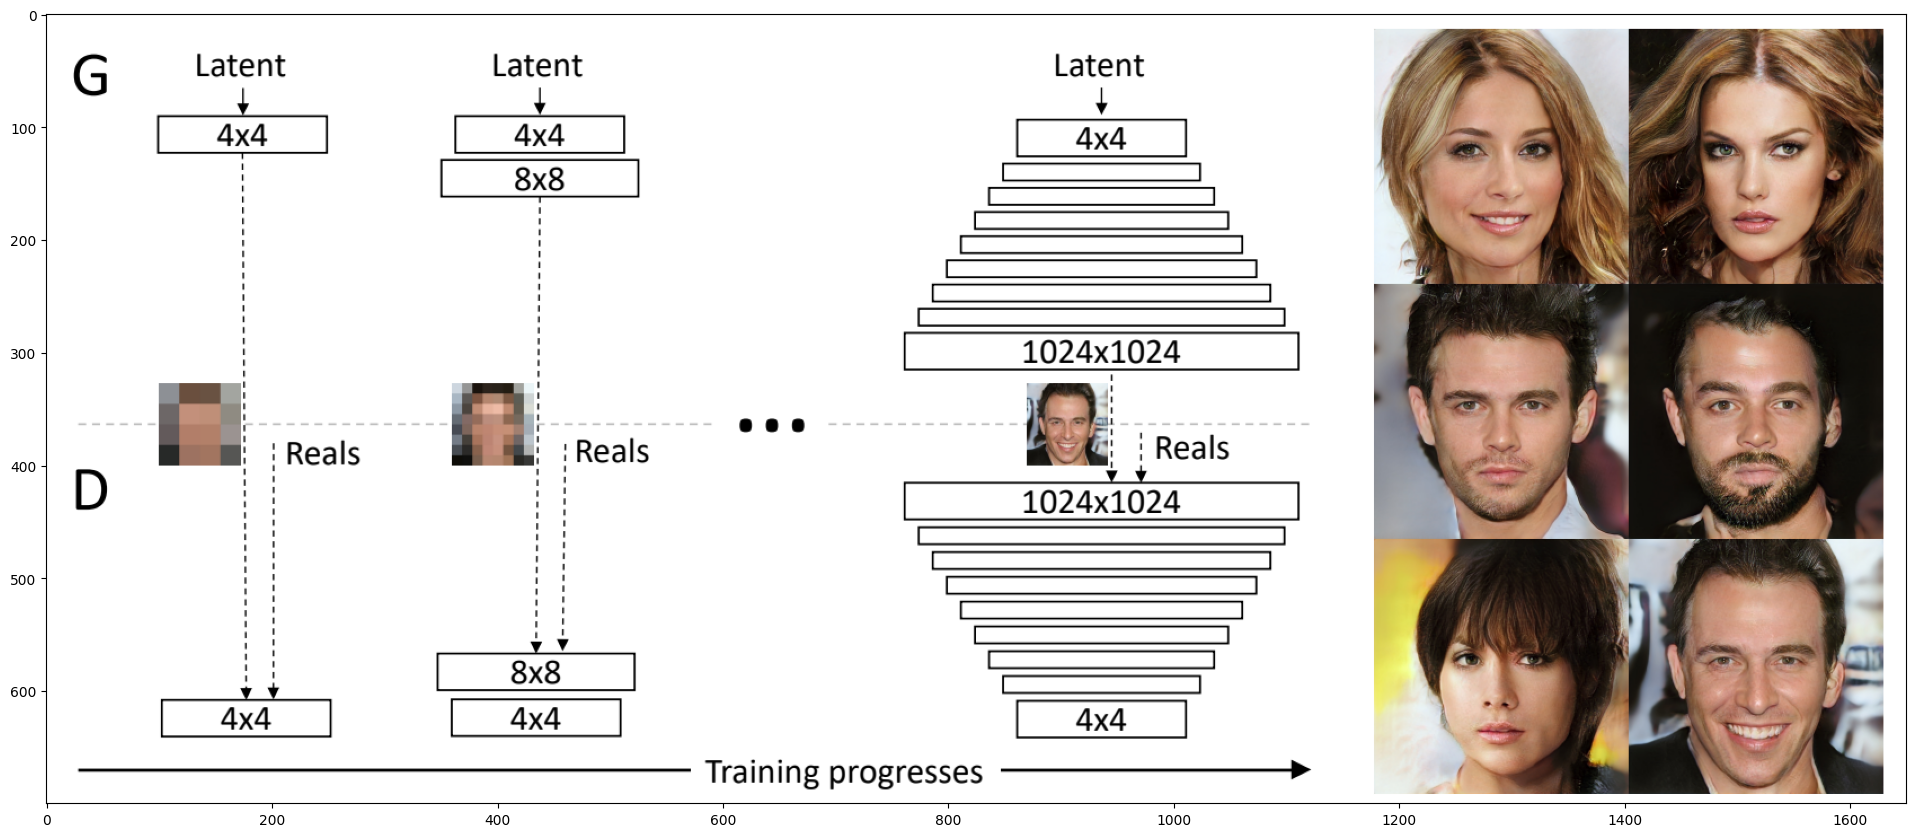

In [2]:
plt.figure(figsize=(24, 24))
plt.imshow(Image.open("protraining.PNG"))

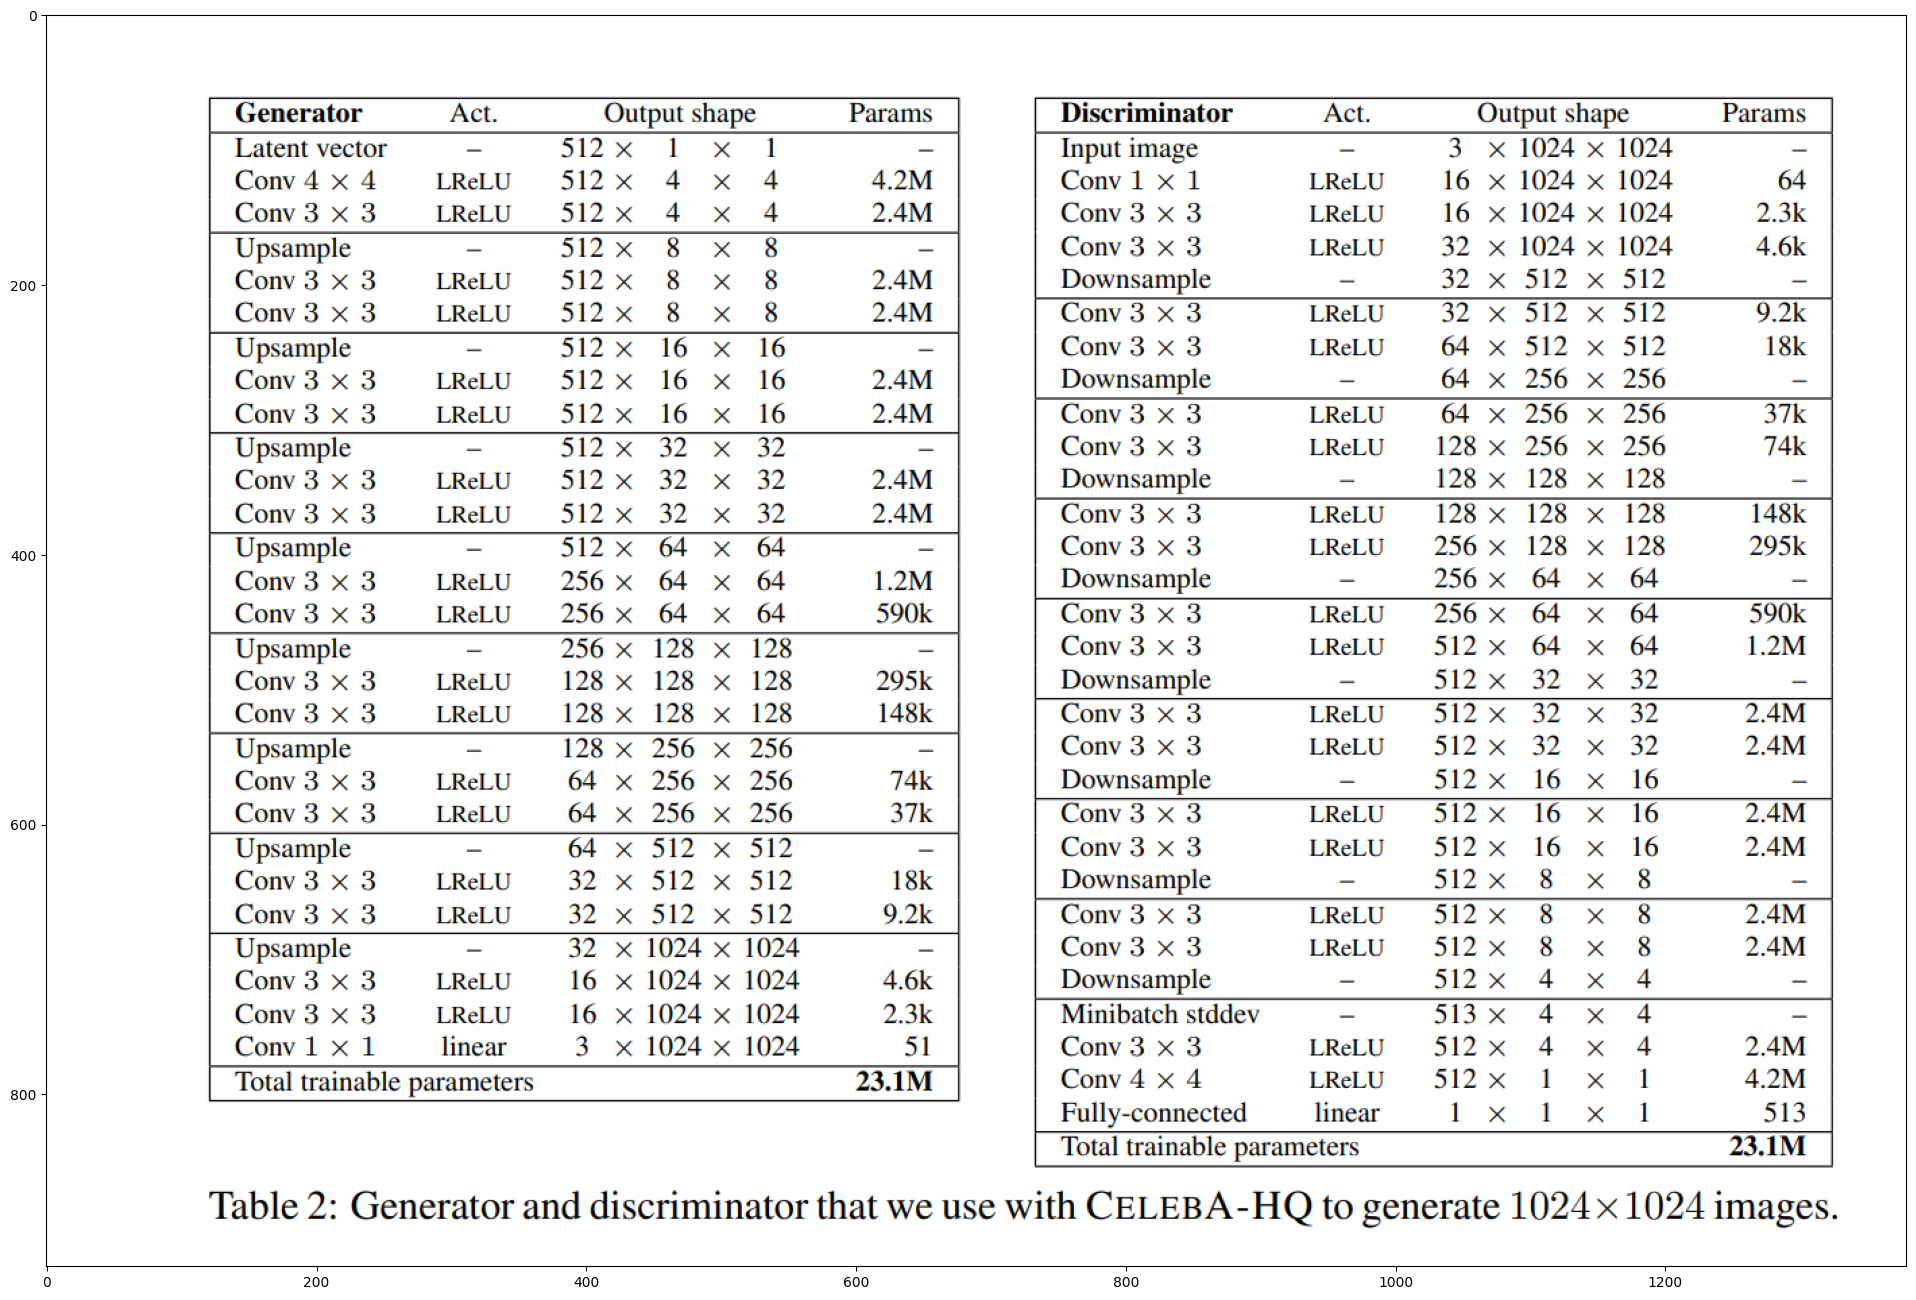

In [3]:
plt.figure(figsize=(24, 24))
plt.imshow(Image.open("proarchitecture.PNG"))

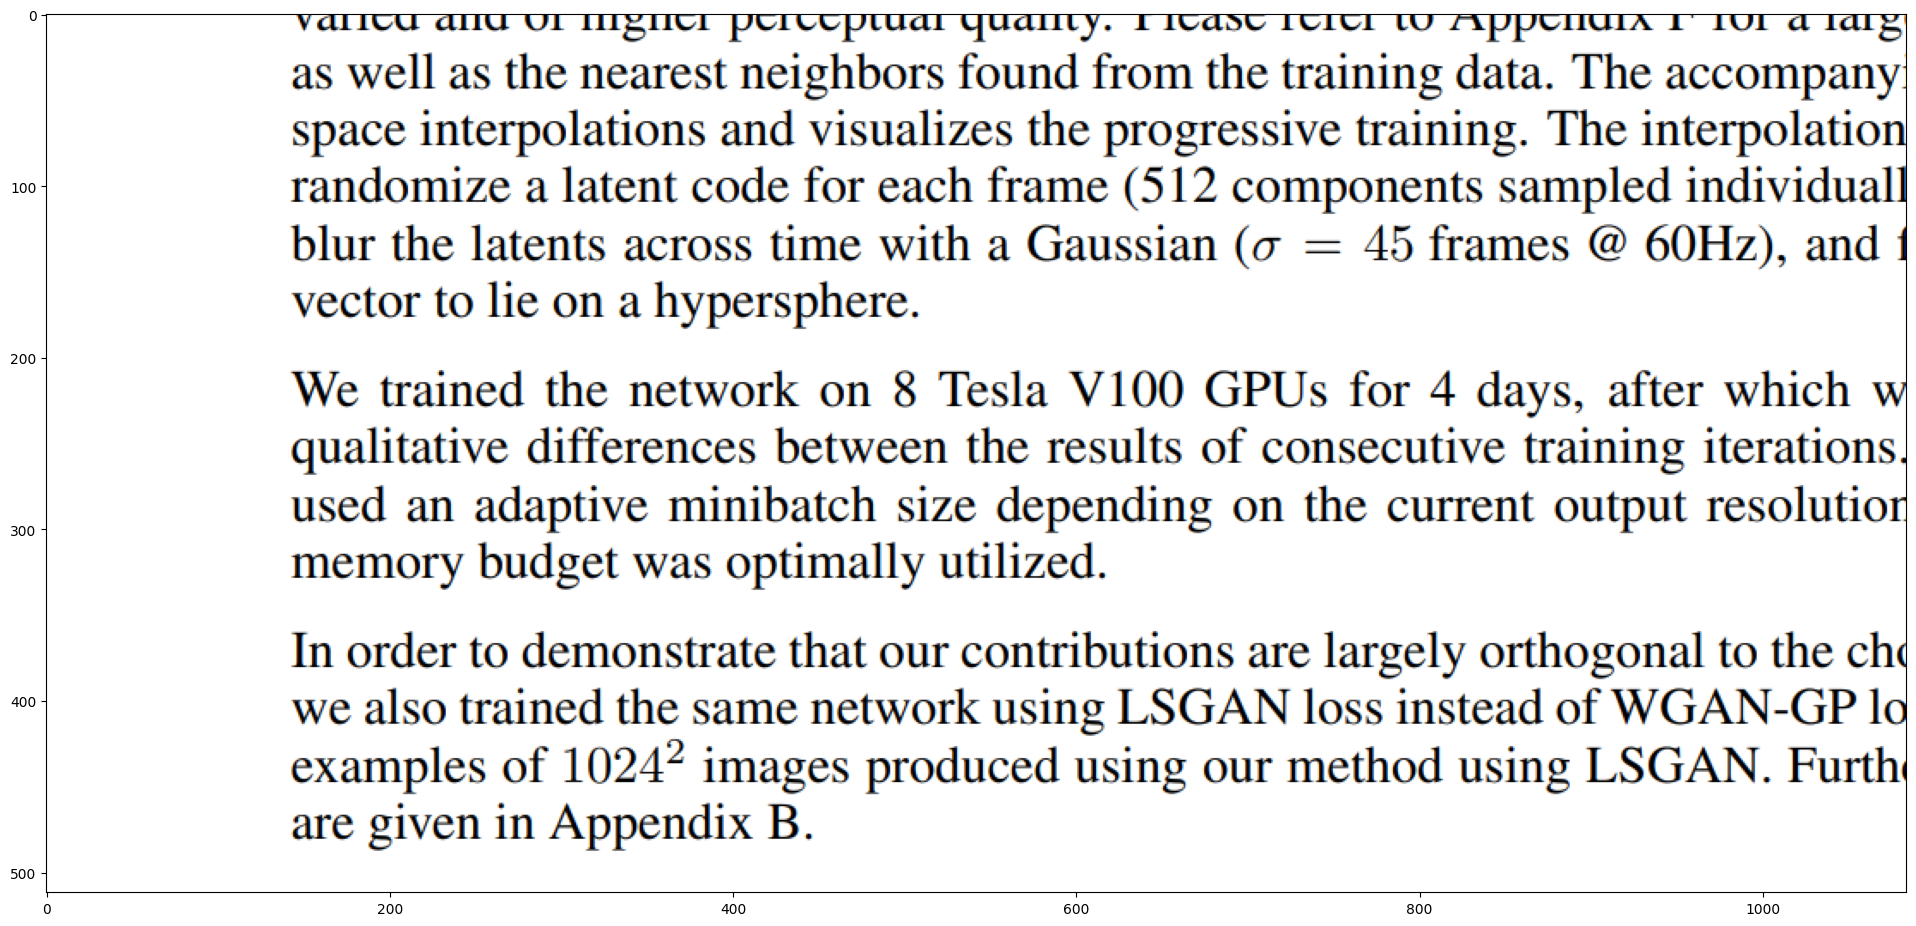

In [4]:
plt.figure(figsize=(24, 24))
plt.imshow(Image.open("proGPU.PNG"))

Showcase

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


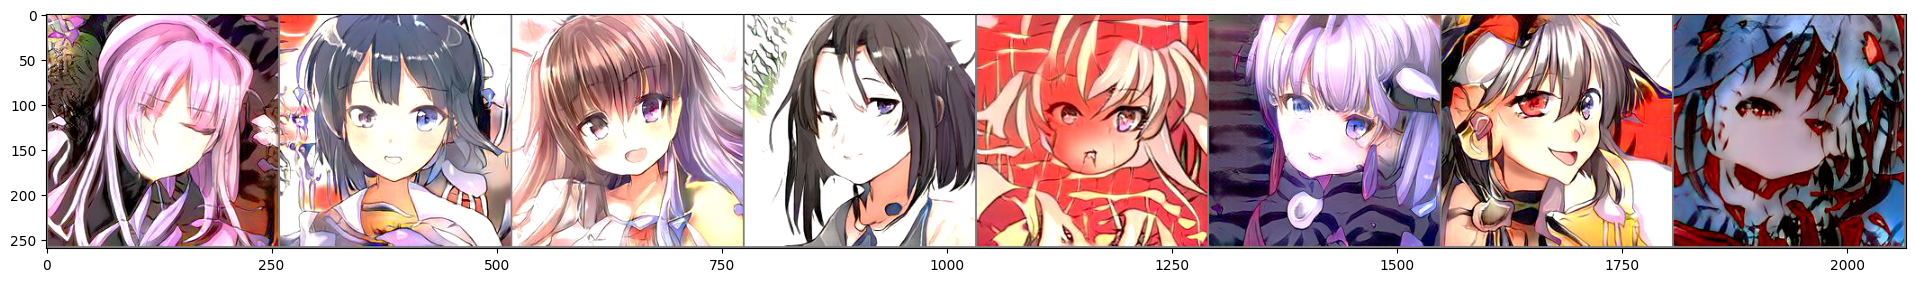

In [28]:
num_images = 16
device = "cpu"

noise = torch.randn((8, 512, 1, 1)).to(device)
gen.to(device)
images = gen(noise)
images = make_grid(images).permute(1,2,0)*0.5 + 0.5
plt.figure(figsize=(24, 24))
plt.imshow(images)
plt.show()

In [6]:
traced_model = torch.jit.trace(gen, noise)
traced_model.save("models/Progressive.pt")